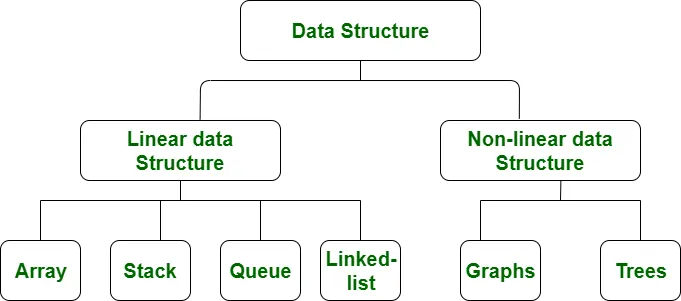

### 02. LINE 인턴 채용 코딩테스트

Q. 나 잡아 봐라

연인 코니와 브라운은 광활한 들판에서 ‘나 잡아 봐라’ 게임을 한다. 
이 게임은 브라운이 코니를 잡거나, 코니가 너무 멀리 달아나면 끝난다. 
게임이 끝나는데 걸리는 최소 시간을 구하시오.

조건은 다음과 같다.
코니는 처음 위치 C에서 1초 후 1만큼 움직이고, 
이후에는 가속이 붙어 매 초마다 이전 이동 거리 + 1만큼 움직인다. 
즉 시간에 따른 코니의 위치는 C, C + 1, C + 3, C + 6, …이다.

브라운은 현재 위치 B에서 다음 순간 B – 1, B + 1, 2 * B 중 하나로 움직일 수 있다.
코니와 브라운의 위치 p는 조건 0 <= x <= 200,000을 만족한다.
브라운은 범위를 벗어나는 위치로는 이동할 수 없고, 코니가 범위를 벗어나면 게임이 끝난다.

In [ ]:
c = 11 # 코니의 처음 위치
b = 2  # 브라운의 처음 위치
# 이렇게 입력된다면 
# 이 경우는 어떻게 늘어날지, 고민해보세요!

# Cony
# 11 12 14 17 21

# Brown
# 02 01
#    03
#    04

# 모든 경우의 수를 다 봐야 하는구나! (수식으로 표현할수 없구나!) -> DFS, BFS 사용하자!

# 위치가 마구잡이로 변함 -> 임의의 키값을 추가하기 쉬운 자료구조 -> Dictionary를 사용하자!

# [0]초에 위치할 수 있었던 곳들
# [1]초에 위치할 수 있었던 곳들 ...
# [{key1: 1, key2: 2, }, {}, {}]


In [7]:
from collections import deque

c = 11
b = 2

def catch_me(cony_loc, brown_loc):
    time = 0
    queue = deque()
    queue.append((brown_loc, 0))
    
    # 시간의 max는 구할 수 없지만, 위치의 max는 정해져 있음 -> 위치 기준으로 평가
    # ex) 10 이라는 위치에 도달했던 시간은 1초, 100초, 700초, ...
    # visitied[10] = {시간: true, ...}
    visited = [{} for _ in range(200001)]
    
    
    while cony_loc <= 200000:
        #cony
        cony_loc += time
        
        if time in visited[cony_loc]:
            return time
        
        # brown
        for i in range(0, len(queue)):  # while queue를 안쓰고 for문을 쓰는 이유? -> 현재 시간 기준으로만 queue를 뽑고 싶어서!
            curr_pos, curr_time = queue.popleft()
            
            new_time = curr_time + 1
            
            new_pos = curr_pos - 1
            if 0 <= new_pos <= 200000 and new_time not in visited[new_pos]:
                visited[new_pos][new_time] = True
                queue.append((new_pos, new_time))
            
            new_pos = curr_pos + 1
            if 0 <= new_pos <= 200000 and new_time not in visited[new_pos]:
                visited[new_pos][new_time] = True
                queue.append((new_pos, new_time))
            
            new_pos = curr_pos * 2
            if 0 <= new_pos <= 200000 and new_time not in visited[new_pos]:
                visited[new_pos][new_time] = True
                queue.append((new_pos, new_time))
        
        time += 1
    return

print(catch_me(c, b))  # 5가 나와야 합니다!

print("정답 = 3 / 현재 풀이 값 = ", catch_me(10,3))
print("정답 = 8 / 현재 풀이 값 = ", catch_me(51,50))
print("정답 = 28 / 현재 풀이 값 = ", catch_me(550,500))

5
정답 = 3 / 현재 풀이 값 =  3
정답 = 8 / 현재 풀이 값 =  8
정답 = 28 / 현재 풀이 값 =  28


In [ ]:
key = "key"
arr = [{key: i} for i in range(10)]  # List Comprehension

# 다음과 동일함
# for i in range(10):
#     arr.append({key: i})

print(arr)
print(arr[0][key])

[{'key': 0}, {'key': 1}, {'key': 2}, {'key': 3}, {'key': 4}, {'key': 5}, {'key': 6}, {'key': 7}, {'key': 8}, {'key': 9}]
0
